In [4]:
from datasets import load_dataset

dataset=load_dataset("imdb",timeout=1000)
dataset.save_to_disk("imdb_dataset")

Saving the dataset (1/1 shards): 100%|██████████| 50000/50000 [00:00<00:00, 624611.54 examples/s]


In [5]:
from datasets import load_dataset, load_from_disk
dataset = load_from_disk("imdb_dataset")

In [6]:
train_texts = dataset["train"]["text"]
train_labels = dataset["train"]["label"]
test_texts = dataset["test"]["text"]
test_labels = dataset["test"]["label"]

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
model_encoders=[CountVectorizer(),
                TfidfVectorizer(),
                CountVectorizer(ngram_range=(1,2)),
                CountVectorizer(binary=True)]


In [12]:
from sklearn.tree import DecisionTreeClassifier  # Nếu muốn dùng cây quyết định
from sklearn.ensemble import RandomForestClassifier  # Đúng cách
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [13]:
model_classifiers=[DecisionTreeClassifier(),
                     RandomForestClassifier(),
                     MultinomialNB(),
                     LogisticRegression(max_iter=500),
                    #  SVC(kernel='linear'),
                     KNeighborsClassifier()]
from sklearn.pipeline import make_pipeline

In [14]:
encoderlist=[]
for encoder in model_encoders:
    classifierlist=[]
    for classifier in model_classifiers:
        
        pipline_cls=make_pipeline(encoder,classifier)
        pipline_cls.fit(train_texts,train_labels)
        accuracy=pipline_cls.score(test_texts,test_labels)
        print(f"Accuracy: {accuracy:.4f} using {encoder} and {classifier}")
        classifierlist.append((accuracy,classifier))
    encoderlist.append((encoder,classifierlist))

Accuracy: 0.7182 using CountVectorizer() and DecisionTreeClassifier()
Accuracy: 0.8424 using CountVectorizer() and RandomForestClassifier()
Accuracy: 0.8136 using CountVectorizer() and MultinomialNB()
Accuracy: 0.8667 using CountVectorizer() and LogisticRegression(max_iter=500)
Accuracy: 0.6235 using CountVectorizer() and KNeighborsClassifier()
Accuracy: 0.7035 using TfidfVectorizer() and DecisionTreeClassifier()
Accuracy: 0.8330 using TfidfVectorizer() and RandomForestClassifier()
Accuracy: 0.8296 using TfidfVectorizer() and MultinomialNB()
Accuracy: 0.8829 using TfidfVectorizer() and LogisticRegression(max_iter=500)
Accuracy: 0.6615 using TfidfVectorizer() and KNeighborsClassifier()
Accuracy: 0.7224 using CountVectorizer(ngram_range=(1, 2)) and DecisionTreeClassifier()
Accuracy: 0.8567 using CountVectorizer(ngram_range=(1, 2)) and RandomForestClassifier()
Accuracy: 0.8569 using CountVectorizer(ngram_range=(1, 2)) and MultinomialNB()
Accuracy: 0.8959 using CountVectorizer(ngram_range=

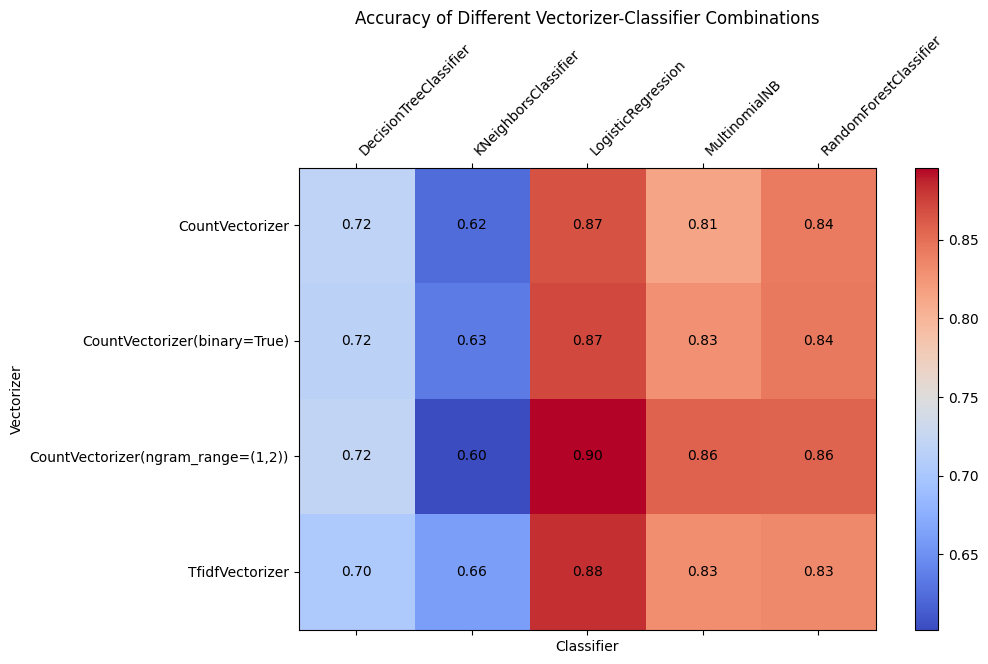

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Dữ liệu Accuracy
models = [
    ("CountVectorizer", "DecisionTreeClassifier", 0.7182),
    ("CountVectorizer", "RandomForestClassifier", 0.8424),
    ("CountVectorizer", "MultinomialNB", 0.8136),
    ("CountVectorizer", "LogisticRegression", 0.8667),
    ("CountVectorizer", "KNeighborsClassifier", 0.6235),
    ("TfidfVectorizer", "DecisionTreeClassifier", 0.7035),
    ("TfidfVectorizer", "RandomForestClassifier", 0.8330),
    ("TfidfVectorizer", "MultinomialNB", 0.8296),
    ("TfidfVectorizer", "LogisticRegression", 0.8829),
    ("TfidfVectorizer", "KNeighborsClassifier", 0.6615),
    ("CountVectorizer(ngram_range=(1,2))", "DecisionTreeClassifier", 0.7224),
    ("CountVectorizer(ngram_range=(1,2))", "RandomForestClassifier", 0.8567),
    ("CountVectorizer(ngram_range=(1,2))", "MultinomialNB", 0.8569),
    ("CountVectorizer(ngram_range=(1,2))", "LogisticRegression", 0.8959),
    ("CountVectorizer(ngram_range=(1,2))", "KNeighborsClassifier", 0.6022),
    ("CountVectorizer(binary=True)", "DecisionTreeClassifier", 0.7166),
    ("CountVectorizer(binary=True)", "RandomForestClassifier", 0.8434),
    ("CountVectorizer(binary=True)", "MultinomialNB", 0.8292),
    ("CountVectorizer(binary=True)", "LogisticRegression", 0.8707),
    ("CountVectorizer(binary=True)", "KNeighborsClassifier", 0.6345),
]

# Chuyển dữ liệu thành danh sách
vectorizers = list(set([m[0] for m in models]))
classifiers = list(set([m[1] for m in models]))
vectorizers.sort()
classifiers.sort()

# Tạo ma trận accuracy
accuracy_matrix = np.zeros((len(vectorizers), len(classifiers)))

for model in models:
    vec_idx = vectorizers.index(model[0])
    clf_idx = classifiers.index(model[1])
    accuracy_matrix[vec_idx, clf_idx] = model[2]

# Vẽ biểu đồ heatmap
fig, ax = plt.subplots(figsize=(10, 6))
cax = ax.matshow(accuracy_matrix, cmap="coolwarm")

# Thêm màu sắc
fig.colorbar(cax)

# Ghi nhãn
ax.set_xticks(np.arange(len(classifiers)))
ax.set_yticks(np.arange(len(vectorizers)))
ax.set_xticklabels(classifiers, rotation=45, ha="left")
ax.set_yticklabels(vectorizers)

# Hiển thị giá trị trong từng ô
for i in range(len(vectorizers)):
    for j in range(len(classifiers)):
        ax.text(j, i, f"{accuracy_matrix[i, j]:.2f}", ha="center", va="center", color="black")

plt.xlabel("Classifier")
plt.ylabel("Vectorizer")
plt.title("Accuracy of Different Vectorizer-Classifier Combinations")
plt.show()


In [ ]:
datasetag = load_dataset("ag_news")
train_texts = dataset["train"]["text"]
train_labels = dataset["train"]["label"]
test_texts = dataset["test"]["text"]
test_labels = dataset["test"]["label"]

In [ ]:
from multiprocessing import Pool

def train_and_evaluate(args):
    encoder, classifier = args
    pipeline_cls = make_pipeline(encoder, classifier)
    pipeline_cls.fit(train_texts, train_labels)
    accuracy = pipeline_cls.score(test_texts, test_labels)
    print(f"Accuracy: {accuracy:.4f} using {encoder} and {classifier}")
    return (accuracy, classifier)

# Chạy song song
encoderlist = []
num_processes = 5  # Chạy 5 tiến trình song song

for encoder in model_encoders:
    with Pool(num_processes) as pool:
        classifierlist = pool.map(train_and_evaluate, [(encoder, clf) for clf in model_classifiers])
    encoderlist.append((encoder, classifierlist))
